# **SciPy**

open-source software for mathematics, science, and engineering

cluster = Clustering algorithms

constants = Physical and mathematical constants

differentiate = Finite difference differentiation tools

fft = Fourier Transforms (scipy.fft)

fftpack = Fast Fourier Transform routines (legacy)

integrate = Integration (scipy.integrate)

interpolate = Interpolation (scipy.interpolate)

io = File IO (scipy.io)

linalg = Linear Algebra (scipy.linalg)

ndimage = Multidimensional Image Processing (scipy.ndimage)

odr = Orthogonal distance regression

optimize = Optimization (scipy.optimize)

signal = Signal Processing (scipy.signal)

sparse = Sparse Arrays (scipy.sparse)

spatial = Spatial Data Structures and Algorithms (scipy.spatial)

special = Special Functions (scipy.special)

stats = Statistics (scipy.stats)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

Special functions (scipy.special)

Integration (scipy.integrate)

Optimization (scipy.optimize)

Interpolation (scipy.interpolate)

Fourier Transforms (scipy.fftpack)

Signal Processing (scipy.signal)

Linear Algebra (scipy.linalg)

Sparse Eigenvalue Problems (scipy.sparse)

Statistics (scipy.stats)

Multi-dimensional image processing (scipy.ndimage)

File IO (scipy.io)

In [ ]:
from scipy import *

In [ ]:
import scipy.linalg as la

# **Special functions**

In [ ]:
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions
# of the first and second kind and real-valued order. We also include the
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [ ]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print ("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


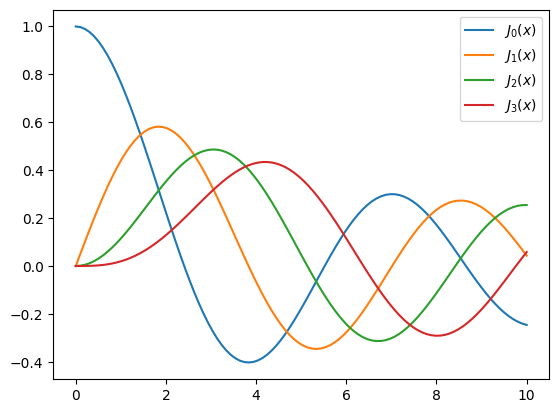

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn  # For Bessel functions

x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)

ax.legend()
plt.show()


In [ ]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

# **Integration**

Numerical integration: quadrature

In [ ]:
from scipy.integrate import quad, dblquad, tplquad

In [ ]:
# define a simple function for the integrand
def f(x):
    return x

In [ ]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print ("integral value =", val, ", absolute error =", abserr)

integral value = 0.5 , absolute error = 5.551115123125783e-15


In [ ]:
def integrand(x, n):
    """
    Bessel function of first kind and order n.
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print (val, abserr)

0.7366751370811074 9.389256877192047e-13


In [ ]:
import numpy as np
from scipy.integrate import quad
from math import exp, sqrt, pi

val, abserr = quad(lambda x: exp(-x ** 2), -np.inf, np.inf)

print("numerical  =", val, abserr)

analytical = sqrt(pi)
print("analytical =", analytical)


numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


In [ ]:
import numpy as np
from scipy.integrate import quad
from math import exp, sqrt, pi

val, abserr = quad(lambda x: exp(-x ** 2), -np.inf, np.inf)

print("numerical  =", val, abserr)

analytical = sqrt(pi)
print("analytical =", analytical)


numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


# **Ordinary differential equations (ODEs)**

An API based on the function odeint, and object-oriented API based on the class ode

In [ ]:
from scipy.integrate import odeint, ode

In [ ]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

In [ ]:
import numpy as np

g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = 6.0 / (m * L**2) * (2 * x3 - 3 * np.cos(x1 - x2) * x4) / (16 - 9 * np.cos(x1 - x2)**2)
    dx2 = 6.0 / (m * L**2) * (8 * x4 - 3 * np.cos(x1 - x2) * x3) / (16 - 9 * np.cos(x1 - x2)**2)
    dx3 = -0.5 * m * L**2 * (dx1 * dx2 * np.sin(x1 - x2) + 3 * (g / L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1 - x2) + (g / L) * np.sin(x2))

    return [dx1, dx2, dx3, dx4]


In [ ]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

In [ ]:
# time coordinate to solve the ODE for: from 0 to 10 seconds
from numpy import linspace
t = linspace(0, 10, 250)

In [ ]:
# solve the ODE problem
import numpy as np

x = odeint(dx, x0, t)

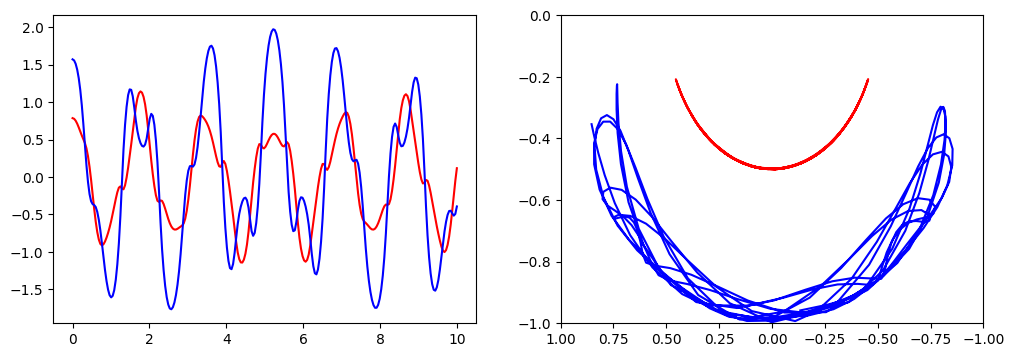

In [ ]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")

import numpy as np

x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])

x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])

axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

In [ ]:
from IPython.display import display, clear_output
import time

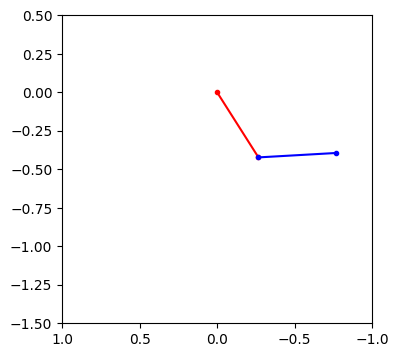

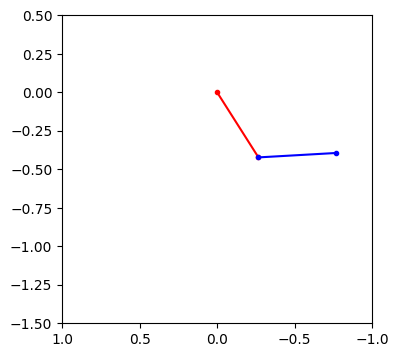

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

import numpy as np

for t_idx, tt in enumerate(t[:200]):
    x1 = + L * np.sin(x[t_idx, 0])
    y1 = - L * np.cos(x[t_idx, 0])

    x2 = x1 + L * np.sin(x[t_idx, 1])
    y2 = y1 - L * np.cos(x[t_idx, 1])

    ax.cla()
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output()
    display(fig)

    time.sleep(0.1)

In [ ]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]

    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [ ]:
# initial state:
y0 = [1.0, 0.0]

In [ ]:
# time coordinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [ ]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critical damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

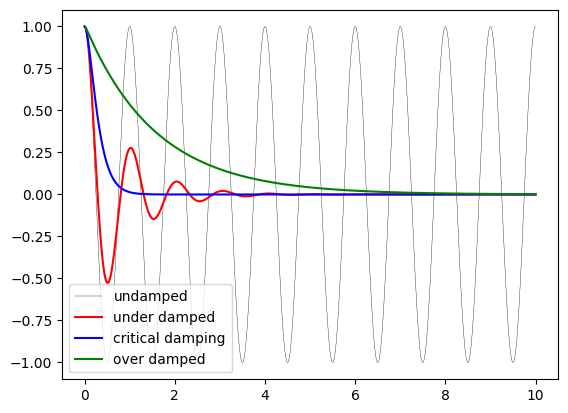

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

# **Fourier transform**

In [ ]:
from numpy.fft import fftfreq
from scipy.fftpack import *

In [ ]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0])

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

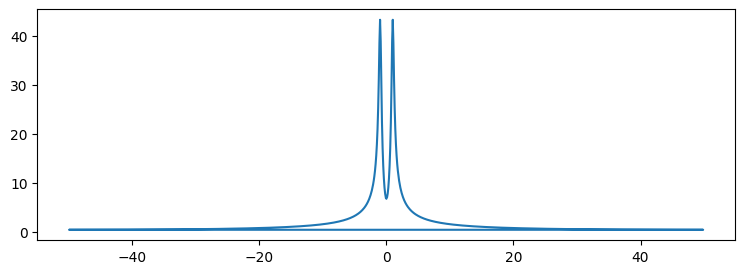

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

In [ ]:
import numpy as np

indices = np.where(w > 0)  # Select only indices for elements that correspond to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

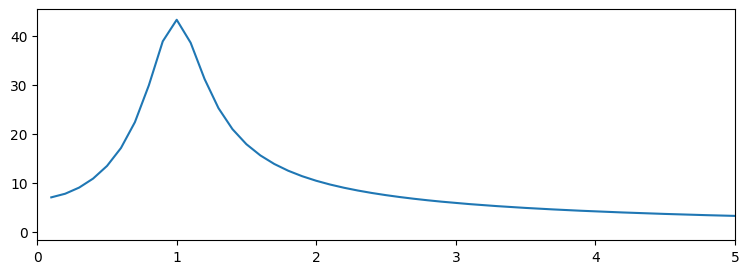

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

# **Linear algebra**

In [ ]:
from scipy.linalg import *

In [ ]:
import numpy as np
from scipy.linalg import solve

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
b = np.array([1, 2, 3])

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
b = np.array([1, 2, 3])

# Using least squares method for approximate solution
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("Solution:", x)
print("Residuals:", residuals)
print("Rank:", rank)
print("Singular Values:", s)


Solution: [-0.05555556  0.11111111  0.27777778]
Residuals: []
Rank: 2
Singular Values: [1.68481034e+01 1.06836951e+00 4.41842475e-16]


In [ ]:
import numpy as np
from numpy.linalg import det

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

determinant = det(A)
print(f"Determinant: {determinant}")


Determinant: 0.0


In [ ]:
x = solve(A, b)


LinAlgError: Matrix is singular.

In [ ]:
# check
np.dot(A, x) - b

array([-1.11022302e-16,  8.88178420e-16,  1.77635684e-15])

In [ ]:
import numpy as np

# Generating random 3x3 matrices
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)

print("Matrix A:\n", A)
print("Matrix B:\n", B)


Matrix A:
 [[0.95019888 0.66194852 0.56446595]
 [0.70981873 0.91945398 0.86654513]
 [0.12835208 0.67897854 0.77179328]]
Matrix B:
 [[0.71093219 0.75973116 0.20471848]
 [0.0670231  0.87294039 0.97237829]
 [0.16064186 0.29623586 0.97444629]]


In [ ]:
X = solve(A, B)

In [ ]:
X

array([[  2.73154382,  -0.09819417,  -1.4558697 ],
       [-10.55637333,   3.79259058,   4.46733057],
       [  9.04075433,  -2.93634107,  -2.42540514]])

In [ ]:
# check
import numpy as np

# Example random matrices
A = np.random.rand(3, 3)
X = np.random.rand(3, 3)
B = np.random.rand(3, 3)

# Correct dot product and norm syntax
result = np.linalg.norm(np.dot(A, X) - B)

print("Result:", result)


Result: 0.6444567142717144


## **Eigenvalues and eigenvectors**

In [ ]:
evals = eigvals(A)
evals

array([ 1.27597295+0.j,  0.38133147+0.j, -0.17697118+0.j])

In [ ]:
evals, evecs = eig(A)

In [ ]:
evals

array([ 1.27597295+0.j,  0.38133147+0.j, -0.17697118+0.j])

In [ ]:
evecs

array([[-0.86438883, -0.62943301, -0.34303594],
       [-0.21049417,  0.65062514, -0.02860492],
       [-0.45664445,  0.42485411,  0.93888663]])

In [ ]:
n = 1

norm(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

Result: 2.220446049250313e-16


## **Matrix operations**

In [ ]:
# the matrix inverse
inv(A)

In [ ]:
# determinant
det(A)

-0.0861086267068873

In [ ]:
# norms of various orders
import numpy as np
from numpy.linalg import norm

print(norm(A, ord=2), norm(A, ord=np.inf))


5.116672736016927 5.0


## **Sparse matrices**

In [ ]:
from scipy.sparse import *

In [ ]:
# dense matrix
import numpy as np

M = np.array([[1, 0, 0, 0],
              [0, 3, 0, 0],
              [0, 1, 1, 0],
              [1, 0, 0, 1]])
print(M)


[[1 0 0 0]
 [0 3 0 0]
 [0 1 1 0]
 [1 0 0 1]]


In [ ]:
# convert from dense to sparse
A = csr_matrix(M); A

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [ ]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

In [ ]:
A

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [ ]:
A = csr_matrix(A); A

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [ ]:
A = csc_matrix(A); A

<Compressed Sparse Column sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [ ]:
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

In [ ]:
(A * A).todense()

matrix([[1, 0, 0, 0],
        [0, 9, 0, 0],
        [0, 4, 1, 0],
        [2, 0, 0, 1]])

In [ ]:
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

In [ ]:
A.dot(A).todense()

matrix([[1, 0, 0, 0],
        [0, 9, 0, 0],
        [0, 4, 1, 0],
        [2, 0, 0, 1]])

In [ ]:
import numpy as np

v = np.array([1, 2, 3, 4])[:, np.newaxis]
print(v)


[[1]
 [2]
 [3]
 [4]]


In [ ]:
# sparse matrix - dense vector multiplication
A * v

array([[1],
       [6],
       [5],
       [5]])

In [ ]:
# same result with dense matrix - dense vector multiplication
A.todense() * v

matrix([[1],
        [6],
        [5],
        [5]])

# **Optimization**

In [ ]:
from scipy import optimize

## **Finding a minima**

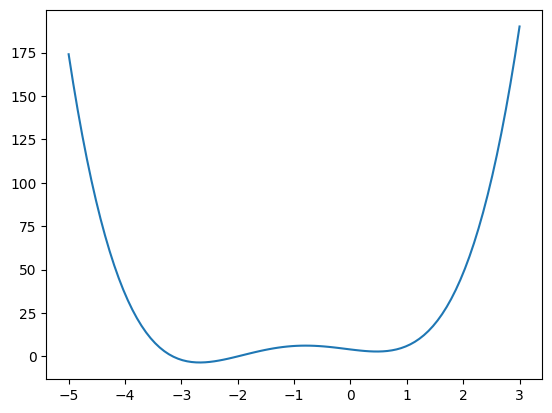

In [ ]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4
fig, ax  = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [ ]:
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

In [ ]:
optimize.fmin_bfgs(f, 0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

In [ ]:
optimize.brent(f)

0.46961743402759754

In [ ]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

## **Finding a solution to a function**

In [ ]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

NameError: name 'tan' is not defined

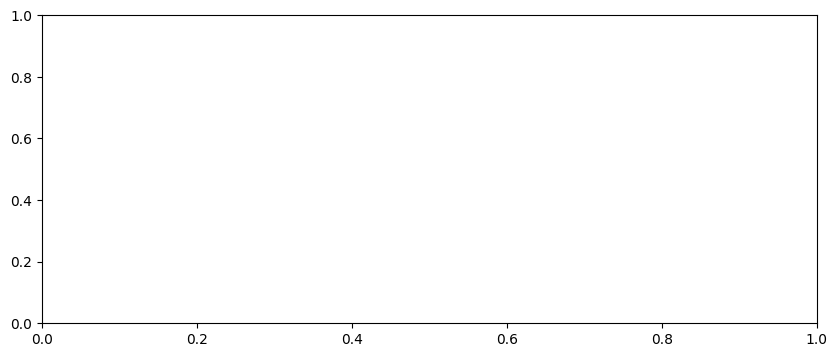

In [ ]:
fig, ax  = plt.subplots(figsize=(10,4))
x = linspace(0, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [ ]:
optimize.fsolve(f, 0.1)

array([0.21612385])

In [ ]:
optimize.fsolve(f, 0.6)

array([0.6574377])

In [ ]:
optimize.fsolve(f, 1.1)

# **Interpolation**

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x)

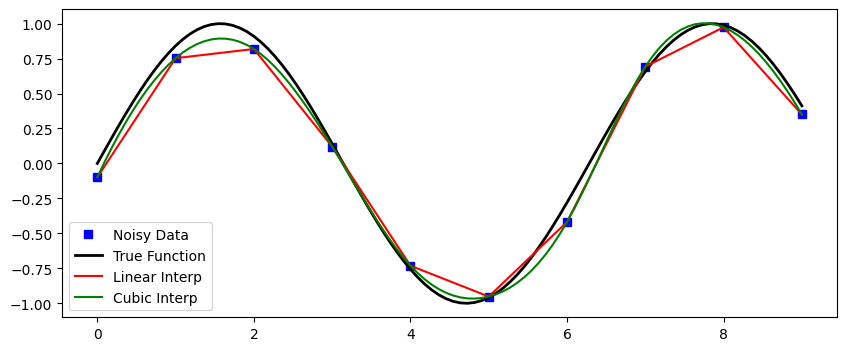

In [ ]:
# Data generation
n = np.arange(0, 10)
x = np.linspace(0, 9, 100)

# Simulate noisy measurements
y_meas = f(n) + 0.1 * np.random.randn(len(n))  # Corrected randn()
y_real = f(x)

# Interpolation
linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(n, y_meas, 'bs', label='Noisy Data')
ax.plot(x, y_real, 'k', lw=2, label='True Function')
ax.plot(x, y_interp1, 'r', label='Linear Interp')
ax.plot(x, y_interp2, 'g', label='Cubic Interp')
ax.legend(loc=3)

plt.show()

# **Statistics**

In [ ]:
from scipy import stats
# create a (discrete) random variable with Poissonian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

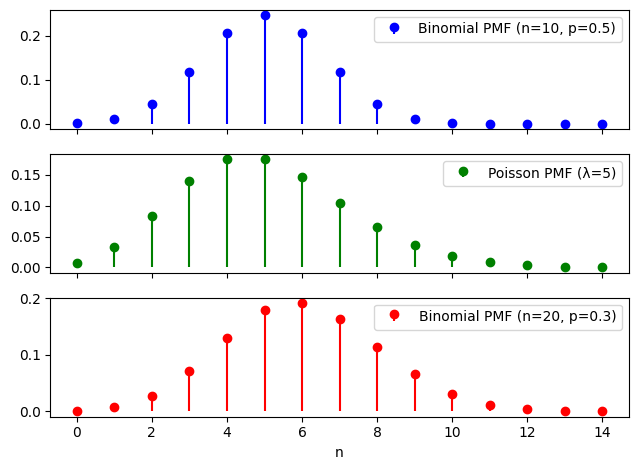

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

n = np.arange(0, 15)

fig, axes = plt.subplots(3, 1, sharex=True)

# Plot the Probability Mass Function (PMF)
axes[0].stem(n, binom.pmf(n, 10, 0.5), basefmt=" ", linefmt='b-', markerfmt='bo', label='Binomial PMF (n=10, p=0.5)')
axes[0].legend()

axes[1].stem(n, poisson.pmf(n, 5), basefmt=" ", linefmt='g-', markerfmt='go', label='Poisson PMF (λ=5)')
axes[1].legend()

axes[2].stem(n, binom.pmf(n, 20, 0.3), basefmt=" ", linefmt='r-', markerfmt='ro', label='Binomial PMF (n=20, p=0.3)')
axes[2].legend()

plt.xlabel('n')
plt.tight_layout()
plt.show()


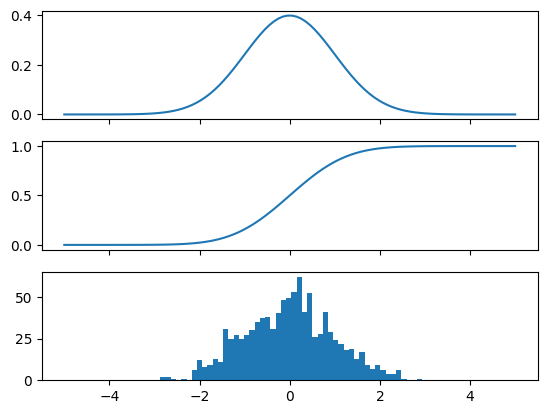

In [ ]:
# create a (continuous) random variable with normal distribution
Y = stats.norm()
x = linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the cumulative distribution function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [ ]:
X.mean(), X.std(), X.var() # Poisson distribution

(3.5, 1.8708286933869707, 3.5)

In [ ]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

## **Statistical tests**

In [ ]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print ("t-statistic =", t_statistic)
print ("p-value =", p_value)

t-statistic = -1.7499858682186762
p-value = 0.080274252610358


In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

TtestResult(statistic=-4.73486008056616, pvalue=2.50849499845838e-06, df=999)

In [ ]:
Y.mean()

0.0

In [ ]:

stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

TtestResult(statistic=1.4357862836864024, pvalue=0.15137619808912936, df=999)

In [ ]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

  Preparing metadata (setup.py) ... done
  Created wheel for version_information: filename=version_information-1.0.4-py3-none-any.whl size=3898 sha256=d542804979d4cb94fbc36b9bab57cefa3b8c262fe723abf7093e2a254dc00687
  Stored in directory: /root/.cache/pip/wheels/47/7d/72/b26285eb636e3fb76a7a4a42caa93287b89e636ec21a6afe7f
Successfully built version_information
